In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display, HTML
import numpy as np
# Redbook and Sales data files
redbook_data_path = "Data/Redbook_data.csv"
Sales_data_path = "Data/Sales_Data.csv"

In [79]:
# Read the redbook data
redbook_data = pd.read_csv(redbook_data_path, encoding='iso-8859-1')
redbook_data.head()

C:\Users\AjgOI\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Redbook_Code,Make,Brand,Model,Variant,Manufacture_year,Model_year,Description,Series,Body_type,...,Piston_type,Country_of_origin,Wheel_type,Fuel_efficiency_low_(L/100km),Fuel_efficiency_high_(L/100km),2021_sale_price_wholesale_low,2021_sale_price_wholesale_high,2021_sale_price_retail_low,2021_sale_price_retail_high,Retail_price_when_new
0,AUVABAR2011AEAA,ABAR,ABARTH,500,PS,2011,2011,Series 1 Hatchback 3dr Esseesse Man 5sp 1.4T,Series 1,HATCHBACK,...,Rack and Pinion,POLAND,"17x7.0f, 17x7.0r",7.4,8.5,"7,200","9,750","8,850","11,650","34,990"
1,AUVABAR2011AEAC,ABAR,ABARTH,695,PS,2011,2011,Series 1 Hatchback 3dr Tributo Ferrari MTA 5sp...,Series 1,HATCHBACK,...,Rack and Pinion,ITALY,"17x7.0f, 17x7.0r",0.0,8.4,"18,850","22,900","21,650","26,050","69,990"
2,AUVABAR2011AEAF,ABAR,ABARTH,500,PS,2011,2011,Series 1 Convertible 2dr Esseesse C MTA 5sp 1.4T,Series 1,CONVERTIBLE,...,Rack and Pinion,POLAND,"17x7.0f, 17x7.0r",7.6,8.5,"9,200","12,050","11,150","14,150","38,990"
3,AUVABAR2011AEAH,ABAR,ABARTH,500,PS,2011,2011,Series 1 Hatchback 3dr Esseesse MTA 5sp 1.4T,Series 1,HATCHBACK,...,Rack and Pinion,POLAND,"17x7.0f, 17x7.0r",7.4,8.5,"7,750","10,300","9,400","12,300",-
4,AUVABAR2012AEAA,ABAR,ABARTH,500,PS,2012,2012,Series 1 Hatchback 3dr Esseesse Man 5sp 1.4T,Series 1,HATCHBACK,...,Rack and Pinion,POLAND,"17x7.0f, 17x7.0r",7.4,8.5,"9,000","11,800","10,900","13,900","34,990"


In [80]:
# Read in the Sales data and Filter to use complete Year data sets and exclude 2021
Sales_data = pd.read_csv(Sales_data_path, encoding='iso-8859-1')
Sales_Filtered = Sales_data.loc[(Sales_data["Year"] <=  2020)]
Sales_Filtered.head()

,Year,Transaction Type,Make Name,Model Name,Body Shape Name,Vechile Type,Transactions
5233,2020,Registration New Business,ABARTH,124 SPIDER,CONVERTIBLE,PASSENGER,1
5234,2020,Registration New Business,ABARTH,124 SPIDER,ROADSTER,PASSENGER,7
5235,2020,Registration New Business,ALFA ROMEO,105,COUPE,PASSENGER,1
5236,2020,Registration New Business,ALFA ROMEO,147,HATCHBACK,PASSENGER,65
5237,2020,Registration New Business,ALFA ROMEO,147 RALLY,HATCHBACK,PASSENGER,1


In [81]:
# Cleanup RedbookData - Removal of blank retail price columns
redbook_data_Pricing = redbook_data.loc[(redbook_data["Retail_price_when_new"] != ' -   ') & 
                                        (redbook_data["2021_sale_price_retail_high"] != ' -   ') &
                                        (redbook_data["2021_sale_price_retail_low"] != ' -   ') &
                                        (redbook_data["2021_sale_price_wholesale_high"] != ' -   ') &
                                        (redbook_data["2021_sale_price_wholesale_low"] != ' -   ')]
#Sort Value by retails price
redbook_data_Pricing = redbook_data_Pricing.sort_values(by=["Retail_price_when_new","Manufacture_year"], ascending=True)
# Removal of string characters in all pricing and change format of all price columns to Float to enable calculations
redbook_data_Pricing["Retail_price_when_new"] = redbook_data_Pricing["Retail_price_when_new"].str.replace(r'\D', '').astype(float)
redbook_data_Pricing["2021_sale_price_retail_high"] = redbook_data_Pricing["2021_sale_price_retail_high"].str.replace(r'\D', '').astype(float)
redbook_data_Pricing["2021_sale_price_retail_low"] = redbook_data_Pricing["2021_sale_price_retail_low"].str.replace(r'\D', '').astype(float)
redbook_data_Pricing["2021_sale_price_wholesale_high"] = redbook_data_Pricing["2021_sale_price_wholesale_high"].str.replace(r'\D', '').astype(float)
redbook_data_Pricing["2021_sale_price_wholesale_low"] = redbook_data_Pricing["2021_sale_price_wholesale_low"].str.replace(r'\D', '').astype(float)
redbook_data_Pricing

,Redbook_Code,Make,Brand,Model,Variant,Manufacture_year,Model_year,Description,Series,Body_type,...,Piston_type,Country_of_origin,Wheel_type,Fuel_efficiency_low_(L/100km),Fuel_efficiency_high_(L/100km),2021_sale_price_wholesale_low,2021_sale_price_wholesale_high,2021_sale_price_retail_low,2021_sale_price_retail_high,Retail_price_when_new
105658,AUVROLL2012AECM,ROLL,ROLLS-ROYCE,PHANTOM,PS,2012,2012,Series II Convertible 2dr Drophead Auto 8sp 6.7i,Series II,CONVERTIBLE,...,Rack and Pinion,UNITED KINGDOM,"21x8.0f, 21x9.5r",0.0,22.8,407900.0,520950.0,444050.0,571600.0,1019000.0
105664,AUVROLL2013AEAD,ROLL,ROLLS-ROYCE,PHANTOM,PS,2013,2013,Series II Convertible 2dr Drophead Auto 8sp 6.7i,Series II,CONVERTIBLE,...,Rack and Pinion,UNITED KINGDOM,"21x8.0f, 21x9.5r",0.0,22.8,421450.0,539850.0,456450.0,589000.0,1019000.0
105673,AUVROLL2013AECU,ROLL,ROLLS-ROYCE,PHANTOM,PS,2013,2013,Series II Convertible 2dr Drophead Auto 8sp 6.7i,Series II,CONVERTIBLE,...,Rack and Pinion,UNITED KINGDOM,"21x8.0f, 21x9.5r",0.0,22.8,446200.0,574650.0,483600.0,626900.0,1019000.0
105680,AUVROLL2014AECO,ROLL,ROLLS-ROYCE,PHANTOM,PS,2014,2014,Series II Convertible 2dr Drophead Auto 8sp 6.7i,Series II,CONVERTIBLE,...,Rack and Pinion,UNITED KINGDOM,"21x8.0f, 21x9.5r",0.0,22.8,466150.0,602450.0,504200.0,654300.0,1019000.0
105684,AUVROLL2014AECS,ROLL,ROLLS-ROYCE,PHANTOM,PS,2014,2014,Series II Convertible 2dr Drophead Auto 8sp 6.7i,Series II,CONVERTIBLE,...,Rack and Pinion,UNITED KINGDOM,"21x8.0f, 21x9.5r",0.0,22.8,490550.0,636700.0,540750.0,691500.0,1019000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118453,AUVTOYO2013AEGB,TOYO,TOYOTA,LANDCRU,LC,2013,2013,VDJ200R Wagon 5dr VX 7st Spts Auto 6sp 4x4 4.5...,VDJ200R,WAGON,...,Rack and Pinion,JAPAN,"18x8.0f, 18x8.0r",0.0,12.0,56950.0,66050.0,63050.0,72850.0,99990.0
133386,AUVVOLV2014AEMC,VOLV,VOLVO,S60,PS,2014,2014,F Series Sedan 4dr Polestar Adap Geartronic 6s...,F Series,SEDAN,...,Rack and Pinion,BELGIUM,"20x8.0f, 20x8.0r",4.9,0.0,24600.0,29300.0,27400.0,32500.0,99990.0
119625,AUVTOYO2018AEHS,TOYO,TOYOTA,LANDCRU,LC,2018,2018,VDJ200R Wagon 5dr VX 7st Spts Auto 6sp 4x4 4.5...,VDJ200R,WAGON,...,Rack and Pinion,JAPAN,"18x8.0f, 18x8.0r",0.0,11.2,82750.0,94750.0,89450.0,102300.0,99990.0
134492,AUVVOLV2020AEFX,VOLV,VOLVO,XC60,LC,2020,2020,UZ Wagon 5dr T8 Polestar Spts Auto 8sp 4x4 2.0...,UZ,WAGON,...,Rack and Pinion,CHINA,"21x8.5f, 21x8.5r",5.2,0.0,76650.0,88000.0,82750.0,94800.0,99990.0


REDBOOK BRAND ANALYSIS
- Detail the 5 Highest Cost Vechile Brands Across Year of Manufacture 2012 - 2020
- Detail the 5 Lowest Cost Vechiles Brands Across Year of Manufacture 2012 - 2020
- Sales Trends indicating what are the most popular brands in QLD sales

In [82]:
# Lowest 5 Brands and Models by Retail Price

redbook_data_Brands = redbook_data_Pricing.loc[:,["Manufacture_year","Brand","Retail_price_when_new","2021_sale_price_retail_high","Country_of_origin"]]

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2012)]
RedbookAppend2012 = RedbookFilter.nlargest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2013)]
RedbookAppend2013 = RedbookFilter.nlargest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2014)]
RedbookAppend2014 = RedbookFilter.nlargest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2015)]
RedbookAppend2015 = RedbookFilter.nlargest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2016)]
RedbookAppend2016 = RedbookFilter.nlargest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2017)]
RedbookAppend2017 = RedbookFilter.nlargest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2018)]
RedbookAppend2018 = RedbookFilter.nlargest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2019)]
RedbookAppend2019 = RedbookFilter.nlargest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2020)]
RedbookAppend2020 = RedbookFilter.nlargest(5,"Retail_price_when_new")

# Concatonate Frames

TopFrames = [RedbookAppend2012,RedbookAppend2013,RedbookAppend2014,RedbookAppend2015,RedbookAppend2016,RedbookAppend2017,RedbookAppend2018,RedbookAppend2019,RedbookAppend2020]

Top5Brands_df = pd.concat(TopFrames)
Top5Brands_df

,Manufacture_year,Brand,Retail_price_when_new,2021_sale_price_retail_high,Country_of_origin
105652,2012,ROLLS-ROYCE,1350000.0,513450.0,UNITED KINGDOM
105651,2012,ROLLS-ROYCE,1260000.0,472250.0,UNITED KINGDOM
105650,2012,ROLLS-ROYCE,1250000.0,468350.0,UNITED KINGDOM
105649,2012,ROLLS-ROYCE,1075000.0,402750.0,UNITED KINGDOM
105658,2012,ROLLS-ROYCE,1019000.0,571600.0,UNITED KINGDOM
105664,2013,ROLLS-ROYCE,1019000.0,589000.0,UNITED KINGDOM
105673,2013,ROLLS-ROYCE,1019000.0,626900.0,UNITED KINGDOM
105663,2013,ROLLS-ROYCE,942000.0,544500.0,UNITED KINGDOM
105672,2013,ROLLS-ROYCE,942000.0,579350.0,UNITED KINGDOM
105662,2013,ROLLS-ROYCE,938000.0,542300.0,UNITED KINGDOM


In [83]:
# Lowest 5 Brands and Models by Retail Price

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2012)]
RedbookSmallAppend2012 = RedbookFilter.nsmallest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2013)]
RedbookSmallAppend2013 = RedbookFilter.nsmallest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2014)]
RedbookSmallAppend2014 = RedbookFilter.nsmallest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2015)]
RedbookSmallAppend2015 = RedbookFilter.nsmallest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2016)]
RedbookSmallAppend2016 = RedbookFilter.nsmallest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2017)]
RedbookSmallAppend2017 = RedbookFilter.nsmallest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2018)]
RedbookSmallAppend2018 = RedbookFilter.nsmallest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2019)]
RedbookSmallAppend2019 = RedbookFilter.nsmallest(5,"Retail_price_when_new")

RedbookFilter = redbook_data_Brands.loc[(redbook_data_Brands["Manufacture_year"] == 2020)]
RedbookSmallAppend2020 = RedbookFilter.nsmallest(5,"Retail_price_when_new")


Smallframes = [RedbookSmallAppend2012,RedbookSmallAppend2013,RedbookSmallAppend2014,RedbookSmallAppend2015,RedbookSmallAppend2016,RedbookSmallAppend2017,RedbookSmallAppend2018,RedbookSmallAppend2019,RedbookSmallAppend2020]

Low5Brands_df = pd.concat(Smallframes)
Low5Brands_df

,Manufacture_year,Brand,Retail_price_when_new,2021_sale_price_retail_high,Country_of_origin
114000,2012,SUZUKI,11790.0,6300.0,INDIA
37474,2012,HOLDEN,12490.0,6400.0,SOUTH KOREA
37651,2012,HOLDEN,12490.0,6700.0,SOUTH KOREA
114002,2012,SUZUKI,12490.0,6650.0,INDIA
90836,2012,MITSUBISHI,12990.0,6400.0,THAILAND
114062,2013,SUZUKI,11790.0,6650.0,INDIA
114125,2013,SUZUKI,11790.0,6850.0,INDIA
37774,2013,HOLDEN,12490.0,7050.0,SOUTH KOREA
37899,2013,HOLDEN,12490.0,7350.0,SOUTH KOREA
114064,2013,SUZUKI,12490.0,7050.0,INDIA


In [84]:
Sales_Filtered = Sales_data.loc[(Sales_data["Year"] <=  2020)]

Transactions
Year Make Name               
2012 TOYOTA            103107
     HOLDEN             68423
     FORD               53640
     NISSAN             40024
     MITSUBISHI         38184
2013 TOYOTA             96209
     HOLDEN             66279
     FORD               50054
     MITSUBISHI         39756
     NISSAN             39555
2014 TOYOTA             92721
     HOLDEN             64358
     FORD               46669
     MITSUBISHI         38193
     HYUNDAI            36007
2015 TOYOTA            100481
     HOLDEN             68178
     FORD               46218
     MITSUBISHI         41488
     HYUNDAI            40453
2016 TOYOTA            100055
     HOLDEN             66356
     FORD               48504
     MITSUBISHI         41511
     HYUNDAI            41377
2017 TOYOTA            102669
     HOLDEN             62667
     FORD               48025
     MITSUBISHI         43037
     MAZDA              40280
2018 TOYOTA            104648
     HOLDEN             58475
     FORD               45337
     MITSUBISHI         44844
     MAZDA              41304
2019 TOYOTA            102088
     HOLDEN             51786
     MITSUBISHI         46268
     FORD               43726
     MAZDA              39615
2020 TOYOTA            107495
     HOLDEN             48329
     FORD               46319
     MITSUBISHI         45927
     MAZDA              40517

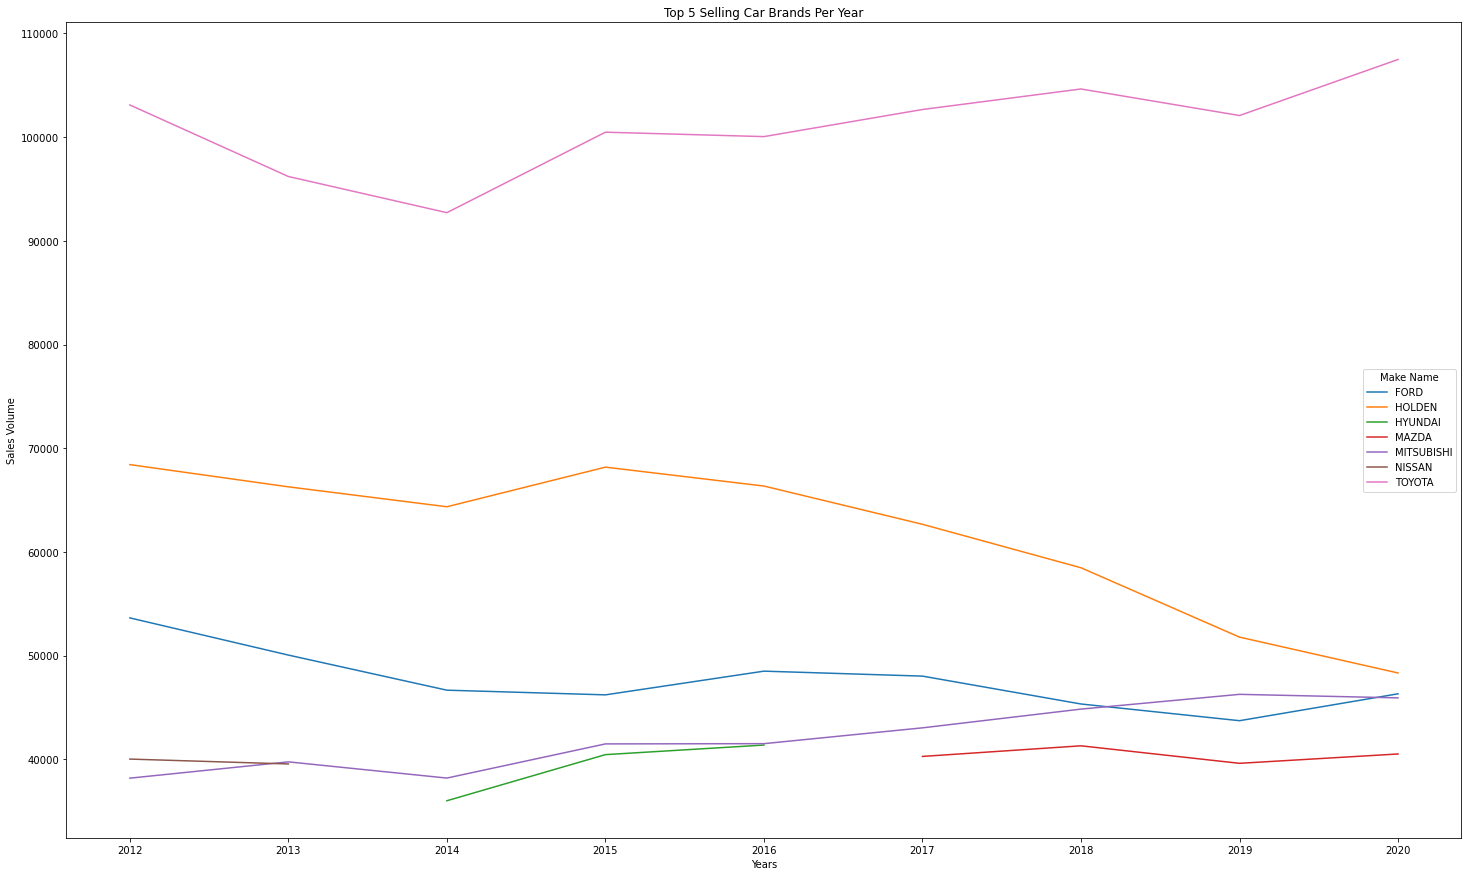

In [85]:
# This is to understand what brands are the best fits

MakeSales = Sales_Filtered.loc[:,["Year","Make Name","Transactions"]]

MakeSalesFilter_2012 = MakeSales.loc[(MakeSales["Year"] == 2012)]
MakeSalesFilter_Group = MakeSalesFilter_2012.groupby(["Year","Make Name"])
MakeSalesFilter_2012_final = MakeSalesFilter_Group["Transactions"].sum()
MakeSales2012 = pd.DataFrame(MakeSalesFilter_2012_final.sort_values(ascending=False))
MakeSalesSorted2012 = MakeSales2012.nlargest(5, "Transactions")

MakeSalesFilter_2013 = MakeSales.loc[(MakeSales["Year"] == 2013)]
MakeSalesFilter_Group = MakeSalesFilter_2013.groupby(["Year","Make Name"])
MakeSalesFilter_2013_final = MakeSalesFilter_Group["Transactions"].sum()
MakeSales2013 = pd.DataFrame(MakeSalesFilter_2013_final.sort_values(ascending=False))
MakeSalesSorted2013 = MakeSales2013.nlargest(5, "Transactions")

MakeSalesFilter_2014 = MakeSales.loc[(MakeSales["Year"] == 2014)]
MakeSalesFilter_Group = MakeSalesFilter_2014.groupby(["Year","Make Name"])
MakeSalesFilter_2014_final = MakeSalesFilter_Group["Transactions"].sum()
MakeSales2014 = pd.DataFrame(MakeSalesFilter_2014_final.sort_values(ascending=False))
MakeSalesSorted2014 = MakeSales2014.nlargest(5, "Transactions")

MakeSalesFilter_2015 = MakeSales.loc[(MakeSales["Year"] == 2015)]
MakeSalesFilter_Group = MakeSalesFilter_2015.groupby(["Year","Make Name"])
MakeSalesFilter_2015_final = MakeSalesFilter_Group["Transactions"].sum()
MakeSales2015 = pd.DataFrame(MakeSalesFilter_2015_final.sort_values(ascending=False))
MakeSalesSorted2015 = MakeSales2015.nlargest(5, "Transactions")

MakeSalesFilter_2016 = MakeSales.loc[(MakeSales["Year"] == 2016)]
MakeSalesFilter_Group = MakeSalesFilter_2016.groupby(["Year","Make Name"])
MakeSalesFilter_2016_final = MakeSalesFilter_Group["Transactions"].sum()
MakeSales2016 = pd.DataFrame(MakeSalesFilter_2016_final.sort_values(ascending=False))
MakeSalesSorted2016 = MakeSales2016.nlargest(5, "Transactions")

MakeSalesFilter_2017 = MakeSales.loc[(MakeSales["Year"] == 2017)]
MakeSalesFilter_Group = MakeSalesFilter_2017.groupby(["Year","Make Name"])
MakeSalesFilter_2017_final = MakeSalesFilter_Group["Transactions"].sum()
MakeSales2017 = pd.DataFrame(MakeSalesFilter_2017_final.sort_values(ascending=False))
MakeSalesSorted2017 = MakeSales2017.nlargest(5, "Transactions")

MakeSalesFilter_2018 = MakeSales.loc[(MakeSales["Year"] == 2018)]
MakeSalesFilter_Group = MakeSalesFilter_2018.groupby(["Year","Make Name"])
MakeSalesFilter_2018_final = MakeSalesFilter_Group["Transactions"].sum()
MakeSales2018 = pd.DataFrame(MakeSalesFilter_2018_final.sort_values(ascending=False))
MakeSalesSorted2018 = MakeSales2018.nlargest(5, "Transactions")

MakeSalesFilter_2019 = MakeSales.loc[(MakeSales["Year"] == 2019)]
MakeSalesFilter_Group = MakeSalesFilter_2019.groupby(["Year","Make Name"])
MakeSalesFilter_2019_final = MakeSalesFilter_Group["Transactions"].sum()
MakeSales2019 = pd.DataFrame(MakeSalesFilter_2019_final.sort_values(ascending=False))
MakeSalesSorted2019 = MakeSales2019.nlargest(5, "Transactions")

MakeSalesFilter_2020 = MakeSales.loc[(MakeSales["Year"] == 2020)]
MakeSalesFilter_Group = MakeSalesFilter_2020.groupby(["Year","Make Name"])
MakeSalesFilter_2020_final = MakeSalesFilter_Group["Transactions"].sum()
MakeSales2020 = pd.DataFrame(MakeSalesFilter_2020_final.sort_values(ascending=False))
MakeSalesSorted2020 = MakeSales2020.nlargest(5, "Transactions")


MakeSalesFrames =[MakeSalesSorted2012,MakeSalesSorted2013,MakeSalesSorted2014,MakeSalesSorted2015,MakeSalesSorted2016,MakeSalesSorted2017,MakeSalesSorted2018,MakeSalesSorted2019,MakeSalesSorted2020]

Top5MakeSales_df = pd.concat(MakeSalesFrames)
Top5MakeSales_df_pivot = Top5MakeSales_df.pivot_table(values="Transactions",index="Year",columns="Make Name",aggfunc=np.sum)
axe = Top5MakeSales_df_pivot.plot(kind='line')
fig = axe.get_figure()
fig.set_size_inches(25,15)

axe.set_xlabel("Years")
axe.set_ylabel("Sales Volume")
axe.set_title("Top 5 Selling Car Brands Per Year")
fig.savefig("Data/Top5BrandSalesPlot.png")

Top5MakeSales_df

C:\Users\AjgOI\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


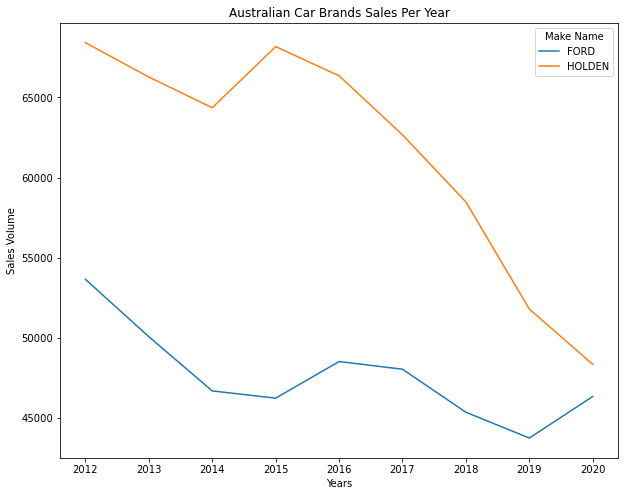

In [86]:
# Traditional Australian Car Brands Holden and Ford Sales Analysis

Sales_Filter_AusCar = Sales_Filtered.loc[(Sales_Filtered["Make Name"] == "HOLDEN")|(Sales_Filtered["Make Name"] == "FORD")]
Sales_Filter_AusCar["YearString"] = Sales_Filtered["Year"].astype(str)
Sales_Filter_AusCar.set_index(["YearString"], inplace=True)
Sales_Filter_AusCar_Final = Sales_Filter_AusCar.loc[:,["Make Name","Transactions"]]
Sales_Filter_AusCar_Final_Pivot = Sales_Filter_AusCar_Final.pivot_table(values="Transactions",index="YearString",columns="Make Name",aggfunc=np.sum)
ax = Sales_Filter_AusCar_Final_Pivot.plot(kind='line')
fig = ax.get_figure()
fig.set_size_inches(10,8)

ax.set_xlabel("Years")
ax.set_ylabel("Sales Volume")
ax.set_title("Australian Car Brands Sales Per Year")
fig.savefig("Data/AusCarSalesPlot.png")

The next frame will need to dig deeper into the specifics of the models that have been dominant in the market.

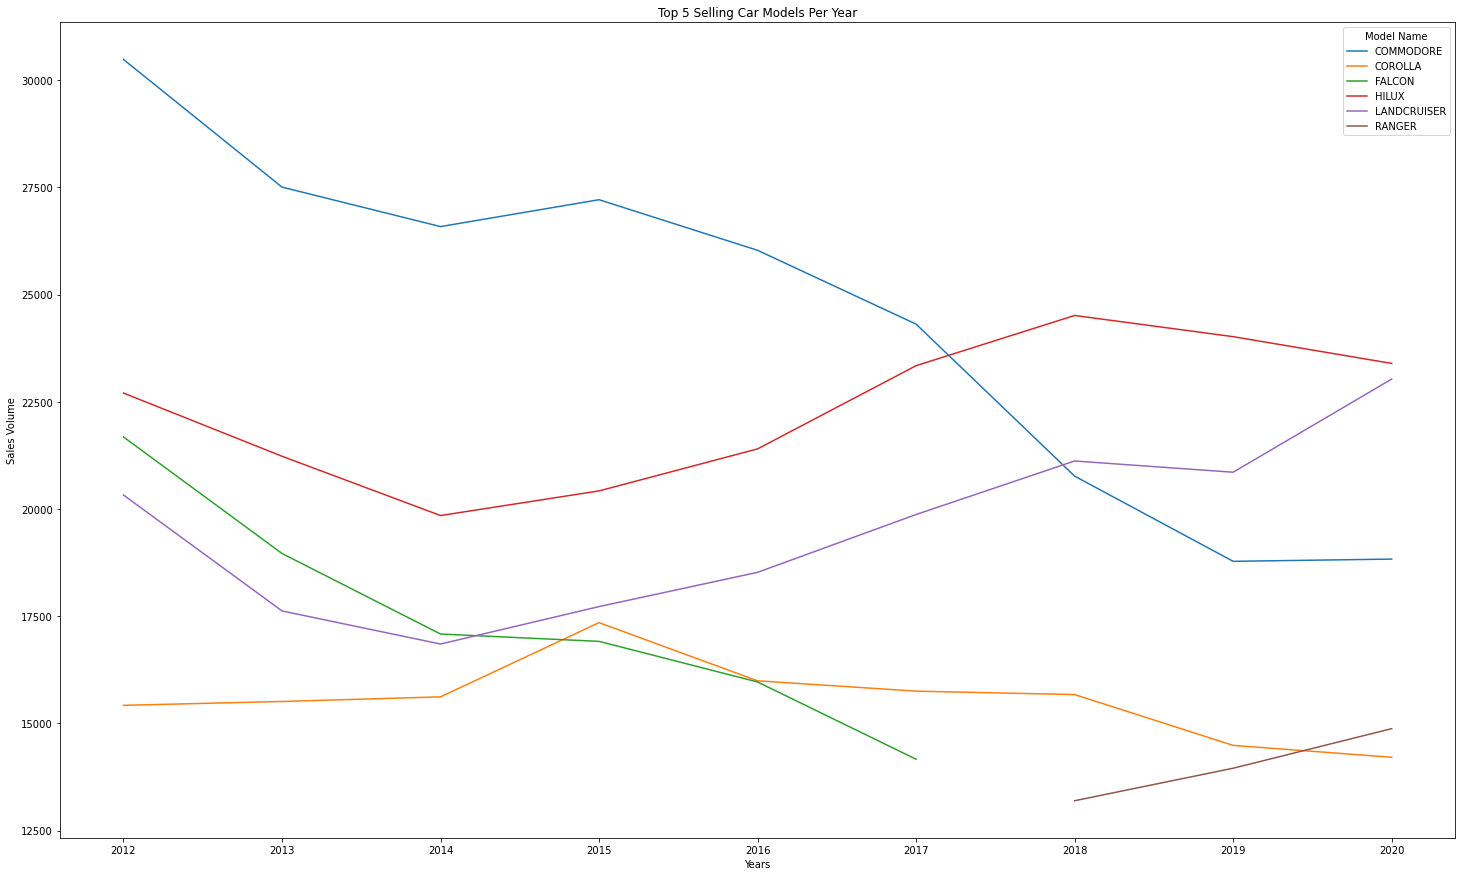

In [87]:
# Make and Model analysis of Sales by year

Sales_Filter_2012 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2012)]
Sales_Filter_Group = Sales_Filter_2012.groupby(["Year","Make Name","Model Name"])
Sales_Filter_2012_final = Sales_Filter_Group["Transactions"].sum()
Sales2012 = pd.DataFrame(Sales_Filter_2012_final.sort_values(ascending=False))
SalesSorted2012 = Sales2012.nlargest(5, "Transactions")

Sales_Filter_2013 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2013)]
Sales_Filter_Group = Sales_Filter_2013.groupby(["Year","Make Name","Model Name"])
Sales_Filter_2013_final = Sales_Filter_Group["Transactions"].sum()
Sales2013 = pd.DataFrame(Sales_Filter_2013_final.sort_values(ascending=False))
SalesSorted2013 = Sales2013.nlargest(5, "Transactions")

Sales_Filter_2014 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2014)]
Sales_Filter_Group = Sales_Filter_2014.groupby(["Year","Make Name","Model Name"])
Sales_Filter_2014_final = Sales_Filter_Group["Transactions"].sum()
Sales2014 = pd.DataFrame(Sales_Filter_2014_final.sort_values(ascending=False))
SalesSorted2014 = Sales2014.nlargest(5, "Transactions")

Sales_Filter_2015 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2015)]
Sales_Filter_Group = Sales_Filter_2015.groupby(["Year","Make Name","Model Name"])
Sales_Filter_2015_final = Sales_Filter_Group["Transactions"].sum()
Sales2015 = pd.DataFrame(Sales_Filter_2015_final.sort_values(ascending=False))
SalesSorted2015 = Sales2015.nlargest(5, "Transactions")

Sales_Filter_2016 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2016)]
Sales_Filter_Group = Sales_Filter_2016.groupby(["Year","Make Name","Model Name"])
Sales_Filter_2016_final = Sales_Filter_Group["Transactions"].sum()
Sales2016 = pd.DataFrame(Sales_Filter_2016_final.sort_values(ascending=False))
SalesSorted2016 = Sales2016.nlargest(5, "Transactions")

Sales_Filter_2017 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2017)]
Sales_Filter_Group = Sales_Filter_2017.groupby(["Year","Make Name","Model Name"])
Sales_Filter_2017_final = Sales_Filter_Group["Transactions"].sum()
Sales2017 = pd.DataFrame(Sales_Filter_2017_final.sort_values(ascending=False))
SalesSorted2017 = Sales2017.nlargest(5, "Transactions")

Sales_Filter_2018 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2018)]
Sales_Filter_Group = Sales_Filter_2018.groupby(["Year","Make Name","Model Name"])
Sales_Filter_2018_final = Sales_Filter_Group["Transactions"].sum()
Sales2018 = pd.DataFrame(Sales_Filter_2018_final.sort_values(ascending=False))
SalesSorted2018 = Sales2018.nlargest(5, "Transactions")

Sales_Filter_2019 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2019)]
Sales_Filter_Group = Sales_Filter_2019.groupby(["Year","Make Name","Model Name"])
Sales_Filter_2019_final = Sales_Filter_Group["Transactions"].sum()
Sales2019 = pd.DataFrame(Sales_Filter_2019_final.sort_values(ascending=False))
SalesSorted2019 = Sales2019.nlargest(5, "Transactions")

Sales_Filter_2020 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2020)]
Sales_Filter_Group = Sales_Filter_2020.groupby(["Year","Make Name","Model Name"])
Sales_Filter_2020_final = Sales_Filter_Group["Transactions"].sum()
Sales2020 = pd.DataFrame(Sales_Filter_2020_final.sort_values(ascending=False))
SalesSorted2020 = Sales2020.nlargest(5, "Transactions")

SalesFrames=[SalesSorted2012,SalesSorted2013,SalesSorted2014,SalesSorted2015,SalesSorted2016,SalesSorted2017,SalesSorted2018,SalesSorted2019,SalesSorted2020]

Top5Sales_df = pd.concat(SalesFrames)
Top5ModelSales_df_pivot = Top5Sales_df.pivot_table(values="Transactions",index="Year",columns="Model Name",aggfunc=np.sum)
axe = Top5ModelSales_df_pivot.plot(kind='line')
fig = axe.get_figure()
fig.set_size_inches(25,15)

axe.set_xlabel("Years")
axe.set_ylabel("Sales Volume")
axe.set_title("Top 5 Selling Car Models Per Year")
fig.savefig("Data/Top5ModelSalesPlot.png")

Count of Model Variants
Manufacture_year Brand                     Model                           
2012             FORD                      FALCON                        24
                                           FALCONU                       40
                                           TERRITO                       15
                 FORD PERFORMANCE VEHICLES F6                             4
                                           F6 E                           1
...                                                                     ...
2019             IVECO                     STXWY                          7
2020             HOLDEN SPECIAL VEHICLES   COLORAD                        4
                 IVECO                     ACCO                           3
                                           STRALIS                        3
                                           STXWY                          7

[127 rows x 1 columns]

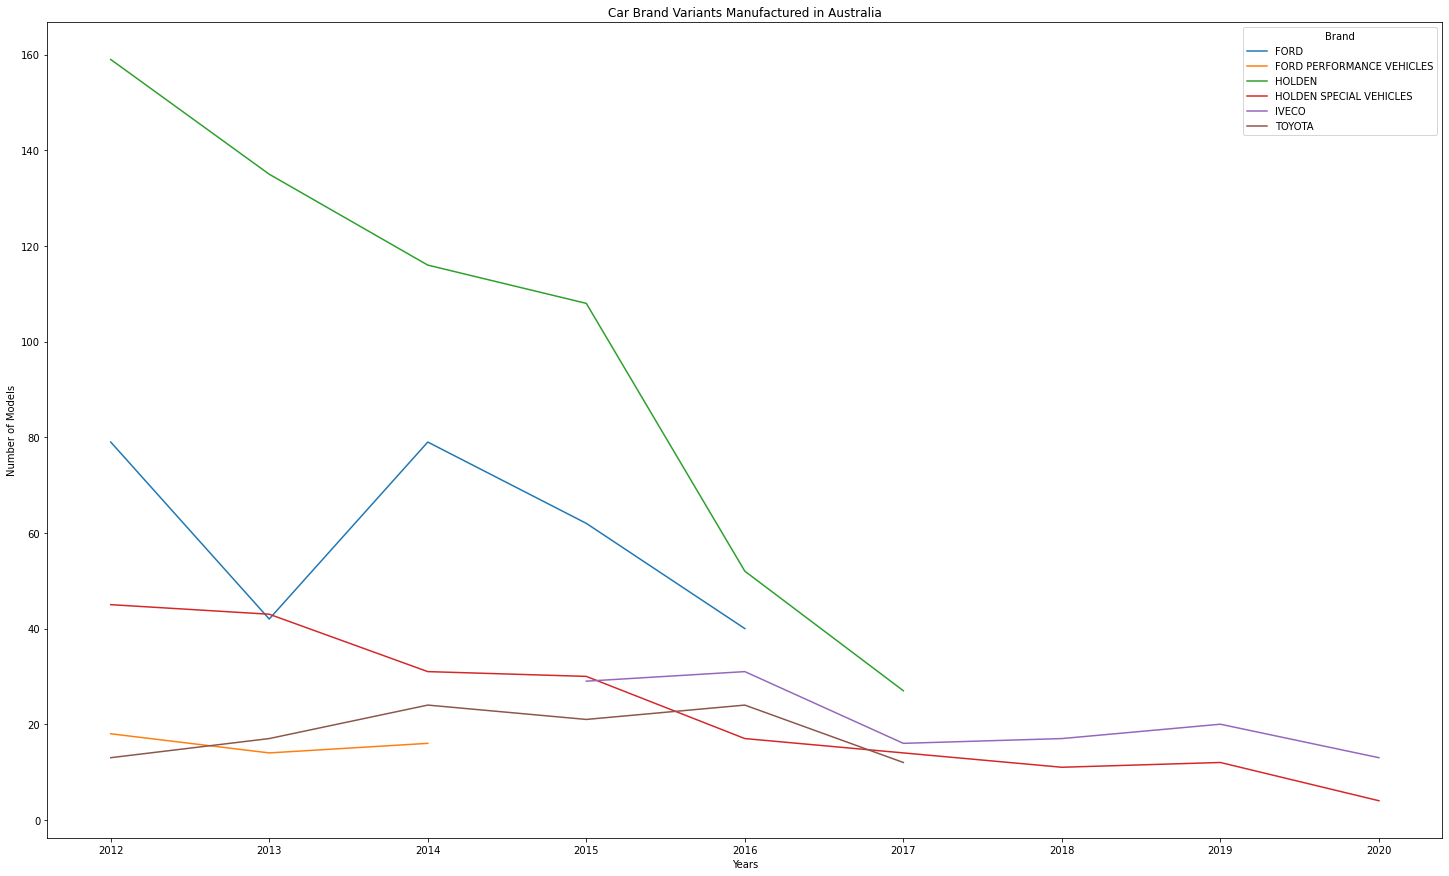

In [88]:
# Holden Commodore Country of Origin vs Year of Manufacture
CountryOrigin = redbook_data_Pricing.loc[:,["Manufacture_year","Brand","Model","Country_of_origin"]]
CountryOrigin_Aus = CountryOrigin.loc[(CountryOrigin["Country_of_origin"] == "AUSTRALIA") & ((CountryOrigin["Manufacture_year"] >= 2012) & (CountryOrigin["Manufacture_year"] <= 2020))]

CountryOrigin_Aus.sort_values(by="Manufacture_year",ascending=True)

AustralianCars = CountryOrigin_Aus.groupby(["Manufacture_year","Brand","Model"]).count()


AustralianCars_df_pivot = AustralianCars.pivot_table(values="Country_of_origin",index="Manufacture_year",columns="Brand",aggfunc=np.sum)
axe = AustralianCars_df_pivot.plot(kind='line')
fig = axe.get_figure()
fig.set_size_inches(25,15)

axe.set_xlabel("Years")
axe.set_ylabel("Number of Models")
axe.set_title("Car Brand Variants Manufactured in Australia")
fig.savefig("Data/AustraliaManufacturedModels.png")

AustralianCars.rename(columns={"Country_of_origin":"Count of Model Variants"})


Body Shape Name,DUAL CAB,HATCHBACK,SEDAN,UTILITY,WAGON
Year,,,,,
2012,45542,117330,124477,46909,111676
2013,48749,116327,116175,43974,114172
2014,46620,102901,110123,41687,125495
2015,51942,111314,115951,42168,148853
2016,55099,106092,110645,43338,158078
2017,61452,105645,101849,43094,164992
2018,65805,104787,93248,41871,181444
2019,67800,96017,86518,39555,187339
2020,67885,90235,88697,40409,199541


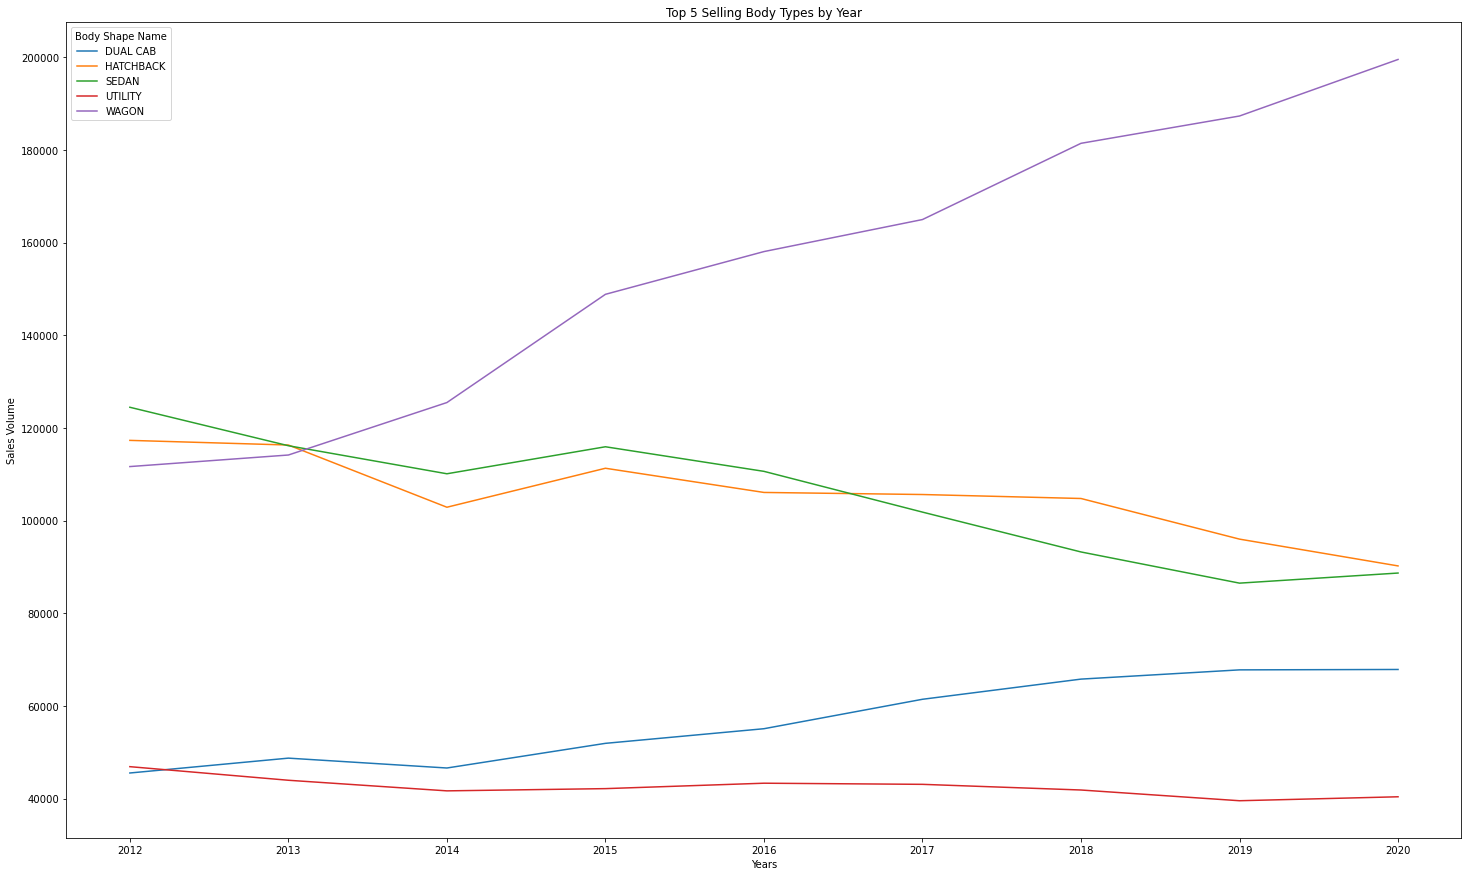

In [89]:
# Body Type Analysis Sales by Year



Body_Filter_2012 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2012)]
Body_Filter_Group = Body_Filter_2012.groupby(["Year","Body Shape Name"])
Body_Filter_2012_final = Body_Filter_Group["Transactions"].sum()
Sales2012 = pd.DataFrame(Body_Filter_2012_final.sort_values(ascending=False))
BodySorted2012 = Sales2012.nlargest(5, "Transactions")

Body_Filter_2013 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2013)]
Body_Filter_Group = Body_Filter_2013.groupby(["Year","Body Shape Name"])
Body_Filter_2013_final = Body_Filter_Group["Transactions"].sum()
Sales2013 = pd.DataFrame(Body_Filter_2013_final.sort_values(ascending=False))
BodySorted2013 = Sales2013.nlargest(5, "Transactions")

Body_Filter_2014 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2014)]
Body_Filter_Group = Body_Filter_2014.groupby(["Year","Body Shape Name"])
Body_Filter_2014_final = Body_Filter_Group["Transactions"].sum()
Sales2014 = pd.DataFrame(Body_Filter_2014_final.sort_values(ascending=False))
BodySorted2014 = Sales2014.nlargest(5, "Transactions")

Body_Filter_2015 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2015)]
Body_Filter_Group = Body_Filter_2015.groupby(["Year","Body Shape Name"])
Body_Filter_2015_final = Body_Filter_Group["Transactions"].sum()
Sales2015 = pd.DataFrame(Body_Filter_2015_final.sort_values(ascending=False))
BodySorted2015 = Sales2015.nlargest(5, "Transactions")

Body_Filter_2016 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2016)]
Body_Filter_Group = Body_Filter_2016.groupby(["Year","Body Shape Name"])
Body_Filter_2016_final = Body_Filter_Group["Transactions"].sum()
Sales2016 = pd.DataFrame(Body_Filter_2016_final.sort_values(ascending=False))
BodySorted2016 = Sales2016.nlargest(5, "Transactions")

Body_Filter_2017 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2017)]
Body_Filter_Group = Body_Filter_2017.groupby(["Year","Body Shape Name"])
Body_Filter_2017_final = Body_Filter_Group["Transactions"].sum()
Sales2017 = pd.DataFrame(Body_Filter_2017_final.sort_values(ascending=False))
BodySorted2017 = Sales2017.nlargest(5, "Transactions")

Body_Filter_2018 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2018)]
Body_Filter_Group = Body_Filter_2018.groupby(["Year","Body Shape Name"])
Body_Filter_2018_final = Body_Filter_Group["Transactions"].sum()
Sales2018 = pd.DataFrame(Body_Filter_2018_final.sort_values(ascending=False))
BodySorted2018 = Sales2018.nlargest(5, "Transactions")

Body_Filter_2019 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2019)]
Body_Filter_Group = Body_Filter_2019.groupby(["Year","Body Shape Name"])
Body_Filter_2019_final = Body_Filter_Group["Transactions"].sum()
Sales2019 = pd.DataFrame(Body_Filter_2019_final.sort_values(ascending=False))
BodySorted2019 = Sales2019.nlargest(5, "Transactions")

Body_Filter_2020 = Sales_Filtered.loc[(Sales_Filtered["Year"] == 2020)]
Body_Filter_Group = Body_Filter_2020.groupby(["Year","Body Shape Name"])
Body_Filter_2020_final = Body_Filter_Group["Transactions"].sum()
Sales2020 = pd.DataFrame(Body_Filter_2020_final.sort_values(ascending=False))
BodySorted2020 = Sales2020.nlargest(5, "Transactions")

BodyFrames=[BodySorted2012,BodySorted2013,BodySorted2014,BodySorted2015,BodySorted2016,BodySorted2017,BodySorted2018,BodySorted2019,BodySorted2020]

Top5BodyType_df = pd.concat(BodyFrames)
Top5BodyTypeSales_df_pivot = Top5BodyType_df.pivot_table(values="Transactions",index="Year",columns=["Body Shape Name"],aggfunc=np.sum)
axe = Top5BodyTypeSales_df_pivot.plot(kind='line')
fig = axe.get_figure()
fig.set_size_inches(25,15)

axe.set_xlabel("Years")
axe.set_ylabel("Sales Volume")
axe.set_title("Top 5 Selling Body Types by Year")
fig.savefig("Data/Top5BodySalesPlot.png")

Top5BodyTypeSales_df_pivot


,Manufacture_year,Brand,Model,Fuel_efficiency_high_(L/100km)
118120,2012,TOYOTA,HILUX,14.6
118382,2013,TOYOTA,HILUX,14.6
118522,2013,TOYOTA,HILUX,14.6
118599,2014,TOYOTA,HILUX,14.6
118768,2015,TOYOTA,HILUX,14.6
...,...,...,...,...
23271,2019,FORD,RANGER,9.4
23345,2019,FORD,RANGER,9.4
23416,2019,FORD,RANGER,9.4
23482,2020,FORD,RANGER,9.4


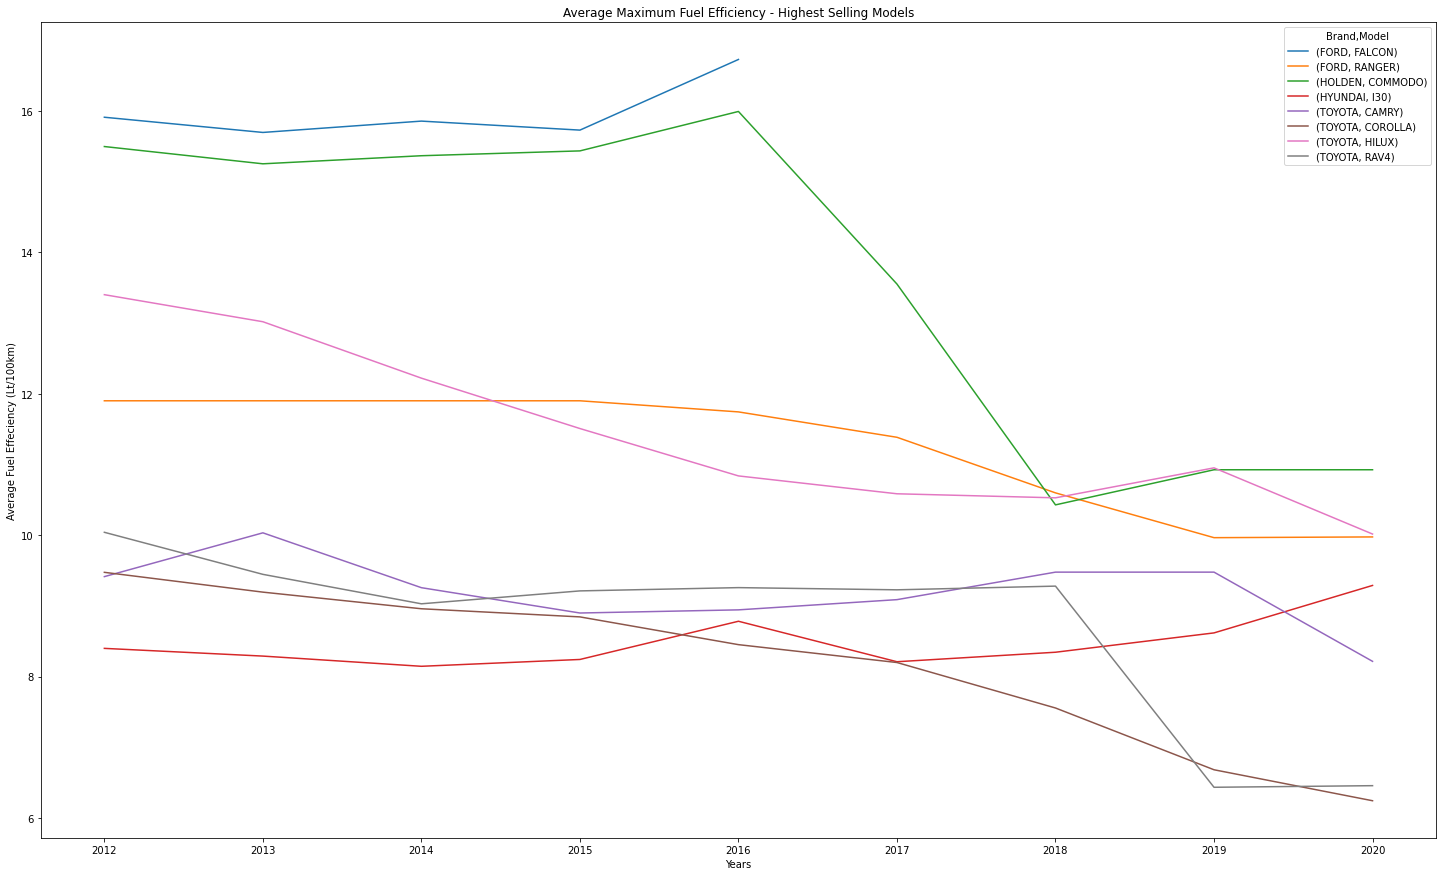

In [90]:
# Average Fuel Efficiency top selling brands and Models

redbook_data_FuelConsumption = redbook_data_Pricing.loc[:,["Manufacture_year","Brand","Model","Fuel_efficiency_high_(L/100km)"]]

redbook_data_FuelConsumption_Filter = redbook_data_FuelConsumption.loc[((redbook_data_FuelConsumption["Manufacture_year"] >= 2012) & (redbook_data_FuelConsumption["Manufacture_year"] <= 2020)) & (redbook_data_FuelConsumption["Fuel_efficiency_high_(L/100km)"] > 0)]
redbook_data_FuelConsumption_Filter_Brands = redbook_data_FuelConsumption_Filter[redbook_data_FuelConsumption_Filter["Model"].isin(["COMMODO","FALCON","CAMRY","COROLLA",'HILUX','RANGER','I30','RAV4','LANDCRUISER'])]

redbook_data_FuelConsumption_df_pivot = redbook_data_FuelConsumption_Filter_Brands.pivot_table(values="Fuel_efficiency_high_(L/100km)",index="Manufacture_year",columns=["Brand","Model"],aggfunc=np.mean)

axe = redbook_data_FuelConsumption_df_pivot.plot(kind='line')
fig = axe.get_figure()
fig.set_size_inches(25,15)

axe.set_xlabel("Years")
axe.set_ylabel("Average Fuel Effeciency (Lt/100km)")
axe.set_title("Average Maximum Fuel Efficiency - Highest Selling Models")
fig.savefig("Data/AverageFuelConsumptions.png")
redbook_data_FuelConsumption_Filter_Brands


,Manufacture_year,Body_type,Fuel_efficiency_high_(L/100km)
105778,2020,SEDAN,21.4
105693,2015,SEDAN,23.0
105709,2016,SEDAN,23.0
105713,2016,SEDAN,23.0
105649,2012,SEDAN,24.6
...,...,...,...
66157,2018,WAGON,8.1
66252,2019,WAGON,8.1
118212,2012,WAGON,12.0
118453,2013,WAGON,12.0


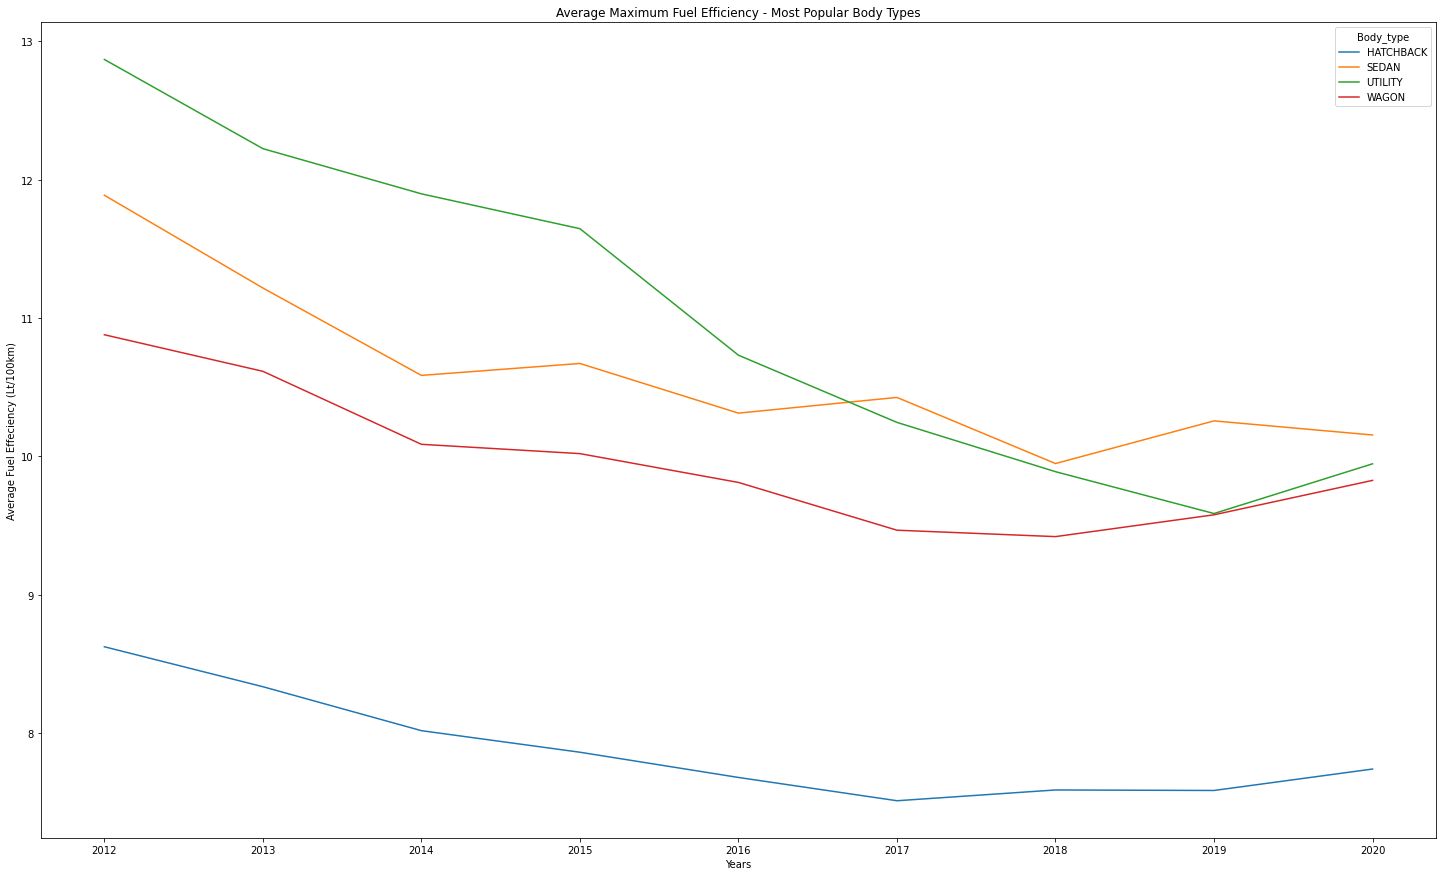

In [91]:
# Average max fuel efficiency

redbook_Body_FuelConsumption = redbook_data_Pricing.loc[:,["Manufacture_year","Body_type","Fuel_efficiency_high_(L/100km)"]]

redbook_Body_FuelConsumption_Filter = redbook_Body_FuelConsumption.loc[((redbook_Body_FuelConsumption["Manufacture_year"] >= 2012) & (redbook_Body_FuelConsumption["Manufacture_year"] <= 2020)) & (redbook_Body_FuelConsumption["Fuel_efficiency_high_(L/100km)"] > 0)]
redbook_Body_FuelConsumption_Filter_Brands = redbook_Body_FuelConsumption_Filter[redbook_Body_FuelConsumption_Filter["Body_type"].isin(["HATCHBACK","SEDAN","WAGON","UTILITY"])]

redbook_Body_FuelConsumption_df_pivot = redbook_Body_FuelConsumption_Filter_Brands.pivot_table(values="Fuel_efficiency_high_(L/100km)",index="Manufacture_year",columns='Body_type',aggfunc=np.mean)

axe = redbook_Body_FuelConsumption_df_pivot.plot(kind='line')
fig = axe.get_figure()
fig.set_size_inches(25,15)

axe.set_xlabel("Years")
axe.set_ylabel("Average Fuel Effeciency (Lt/100km)")
axe.set_title("Average Maximum Fuel Efficiency - Most Popular Body Types")
fig.savefig("Data/AverageFuelConsumptionsBodyType.png")
redbook_Body_FuelConsumption_Filter_Brands

,Manufacture_year,Brand,Model,Retail_price_when_new
118120,2012,TOYOTA,HILUX,18990.0
118382,2013,TOYOTA,HILUX,18990.0
118522,2013,TOYOTA,HILUX,18990.0
118599,2014,TOYOTA,HILUX,18990.0
118768,2015,TOYOTA,HILUX,18990.0
...,...,...,...,...
23271,2019,FORD,RANGER,75390.0
23345,2019,FORD,RANGER,75990.0
23416,2019,FORD,RANGER,76290.0
23482,2020,FORD,RANGER,76490.0


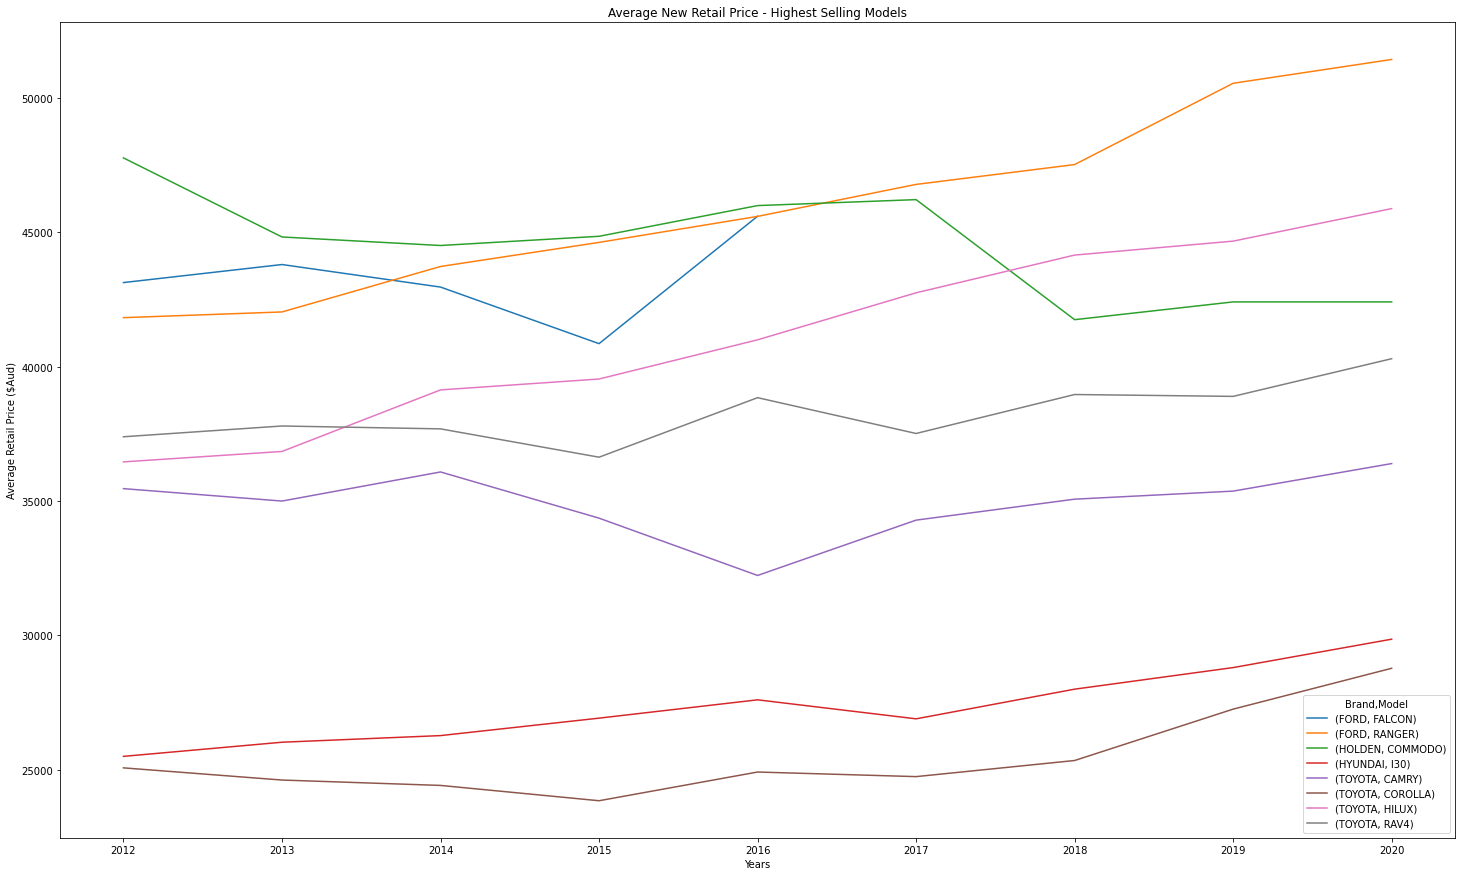

In [92]:
# Average Fuel Efficiency top selling brands and Models

redbook_data_Retail = redbook_data_Pricing.loc[:,["Manufacture_year","Brand","Model","Retail_price_when_new"]]

redbook_data_Retail_Filter = redbook_data_Retail.loc[((redbook_data_Retail["Manufacture_year"] >= 2012) & (redbook_data_Retail["Manufacture_year"] <= 2020)) & (redbook_data_Retail["Retail_price_when_new"] > 0)]
redbook_data_Retail_Filter_Brands = redbook_data_Retail_Filter[redbook_data_Retail_Filter["Model"].isin(["COMMODO","FALCON","CAMRY","COROLLA",'HILUX','RANGER','I30','RAV4','LANDCRUISER'])]

redbook_data_Retail_df_pivot = redbook_data_Retail_Filter_Brands.pivot_table(values="Retail_price_when_new",index="Manufacture_year",columns=["Brand","Model"],aggfunc=np.mean)

axe = redbook_data_Retail_df_pivot.plot(kind='line')
fig = axe.get_figure()
fig.set_size_inches(25,15)

axe.set_xlabel("Years")
axe.set_ylabel("Average Retail Price ($Aud)")
axe.set_title("Average New Retail Price - Highest Selling Models")
fig.savefig("Data/AverageTopModelsRetailPrice.png")
redbook_data_Retail_Filter_Brands

,Manufacture_year,Body_type,Retail_price_when_new
91081,2014,HATCHBACK,11490.0
114000,2012,HATCHBACK,11790.0
114062,2013,HATCHBACK,11790.0
114125,2013,HATCHBACK,11790.0
114141,2014,HATCHBACK,11790.0
...,...,...,...
60480,2017,WAGON,80000.0
10404,2018,HATCHBACK,80000.0
10405,2018,HATCHBACK,80000.0
10604,2019,HATCHBACK,80000.0


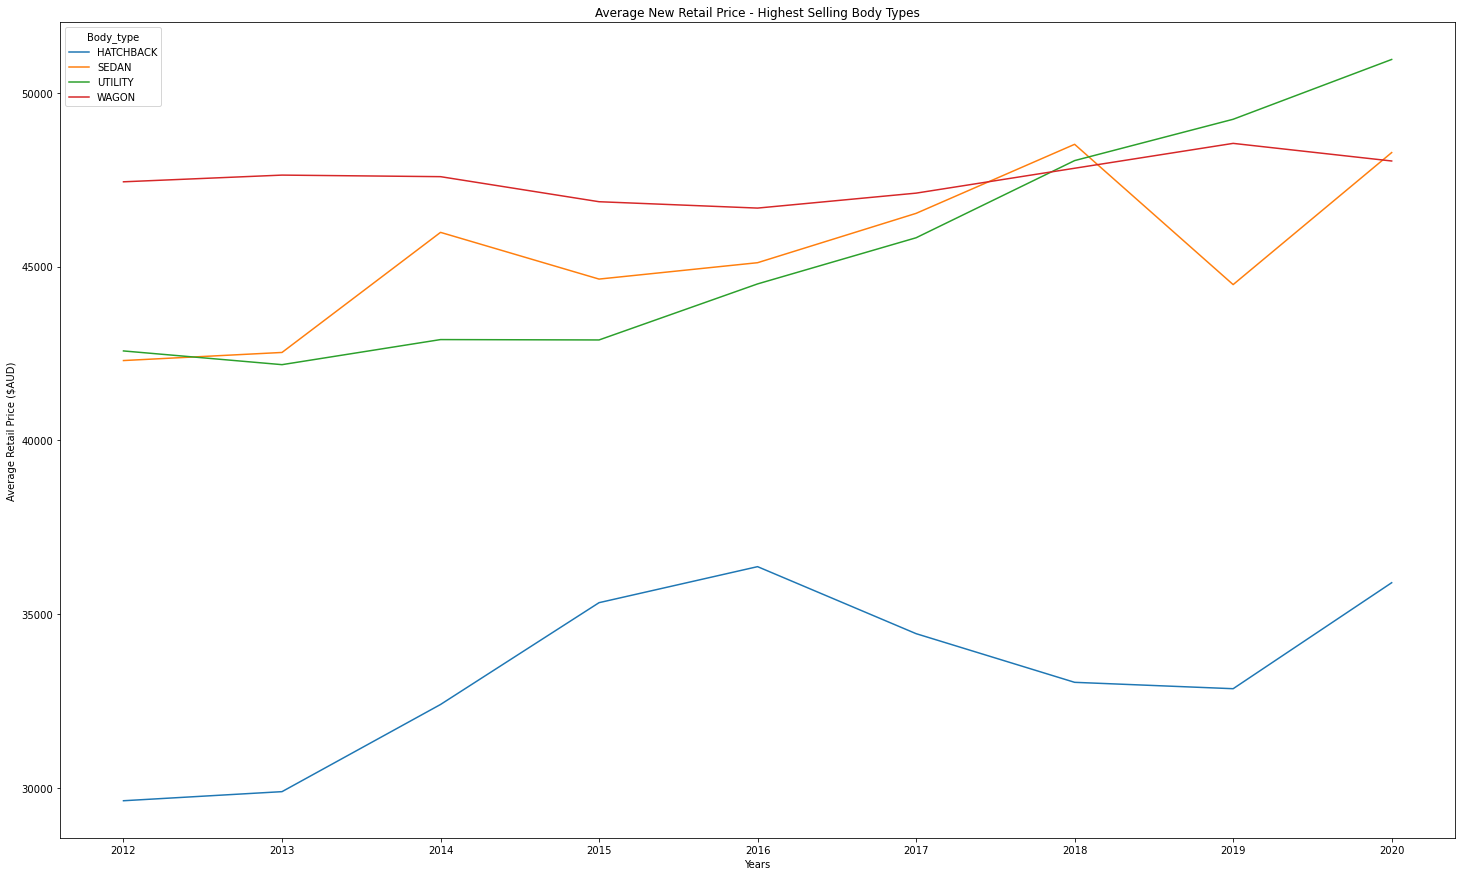

In [93]:
# Average Fuel Efficiency Top selling Body Types

redbook_Bodydata_Retail = redbook_data_Pricing.loc[:,["Manufacture_year",'Body_type',"Retail_price_when_new"]]

redbook_Bodydata_Retail_Filter = redbook_Bodydata_Retail.loc[((redbook_Bodydata_Retail["Manufacture_year"] >= 2012) & (redbook_Bodydata_Retail["Manufacture_year"] <= 2020)) & ((redbook_Bodydata_Retail["Retail_price_when_new"] > 5000) & (redbook_Bodydata_Retail["Retail_price_when_new"] <= 80000))]
redbook_Bodydata_Retail_Filter_Brands = redbook_Bodydata_Retail_Filter[redbook_Bodydata_Retail_Filter["Body_type"].isin(["HATCHBACK","SEDAN","WAGON","UTILITY"])]

redbook_Bodydata_Retail_df_pivot = redbook_Bodydata_Retail_Filter_Brands.pivot_table(values="Retail_price_when_new",index="Manufacture_year",columns="Body_type",aggfunc=np.mean)

axe = redbook_Bodydata_Retail_df_pivot.plot(kind='line')
fig = axe.get_figure()
fig.set_size_inches(25,15)

axe.set_xlabel("Years")
axe.set_ylabel("Average Retail Price ($AUD)")
axe.set_title("Average New Retail Price - Highest Selling Body Types")
fig.savefig("Data/AverageRetailBodyType.png")
redbook_Bodydata_Retail_Filter_Brands

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002CF83C4B860>],
      dtype=object)

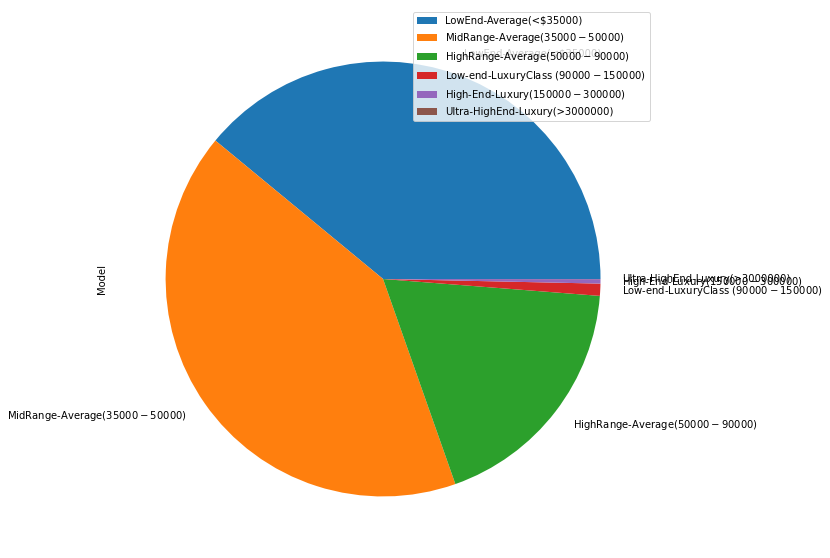

In [95]:
redbook_data_Retail = redbook_data_Pricing.loc[:,["Manufacture_year","Brand","Model","Retail_price_when_new"]]
redbook_data_Retail_Filtered = redbook_data_Retail.loc[(redbook_data_Retail["Manufacture_year"] > 2012) & (redbook_data_Retail["Manufacture_year"] < 2020) & redbook_data_Retail["Brand"].isin(["HOLDEN","FORD","MAZDA","TOYOTA","NISSAN","MITSUBISHI","HYUNDAI"])]

redbook_data_Retail_Filtered_final = redbook_data_Retail_Filtered.rename(columns={"Retail_price_when_new":"Price Category"})

SS_bins = [0,35000,50000,90000,150000,300000,1500000]
SS_labels = ['LowEnd-Average(<$35000)','MidRange-Average($35000-$50000)','HighRange-Average($50000-$90000)','Low-end-LuxuryClass ($90000-$150000)','High-End-Luxury($150000-$300000)', 'Ultra-HighEnd-Luxury(>3000000)']
Result_df_Final_Cut = pd.cut(redbook_data_Retail_Filtered_final['Price Category'], bins=SS_bins, labels=SS_labels)
Result_df_Final_df = pd.DataFrame(redbook_data_Retail_Filtered_final.groupby(Result_df_Final_Cut)['Model'].count().to_frame())

Result_df_Final_df.plot.pie(subplots=True, figsize=(10,10))
